### CNN 실습(MNIST Dataset)

In [23]:
# 필요한 모듈들 import 
import tensorflow as tf, matplotlib.pyplot as plt, numpy as np 
from keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data() # 데이터를 로드하고, 데이터 분할
print(train_images.shape, test_images.shape)
train_images = train_images.reshape((60000, 28, 28, 1)) # 60000 배치, 가로 28 세로 28 채널 1(흑백) 으로 형상변환
test_images = test_images.reshape((10000, 28, 28, 1)) # 10000 배치, 가로 28, 세로 28 채널 1(흑백) 으로 형상변환
train_images, test_images = train_images/255, test_images/255 # 이미지 정규화
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### 모델 설계

모델 설계 방법으로는 Sequential, functional, Subclassing이 있고, 참고는 아래 링크를 참고하자.

https://velog.io/@lighthouse97/Tensorflow%EB%A1%9C-%EB%AA%A8%EB%8D%B8%EC%9D%84-%EB%A7%8C%EB%93%9C%EB%8A%94-3%EA%B0%80%EC%A7%80-%EB%B0%A9%EB%B2%95

설계 순서

계층 구성 ➡️ 모델 컴파일 ➡️ 학습

In [25]:
# Sequential API method, 계층 구성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1))) # 3by3 크기의 32개의 필터로 Feature Map을 추출
model.add(layers.MaxPooling2D((2, 2))) # (2, 2)크기로 MaxPooling 실행
# model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation="relu")) # 3by3 크기의 64개의 필터로 Feature Map을 추출
model.add(layers.MaxPooling2D((2, 2))) # (2, 2)크기로 MaxPooling 실행
model.add(layers.Conv2D(64, (3, 3), activation="relu")) # 3by3 크기의 64개의 필터로 Feature Map을 추출
# model.add(layers.Dropout(0.25))
model.add(layers.Flatten()) # 완전연결망의 input 부분. 평탄화 작업을 진행한다.
model.add(layers.Dense(64, activation="relu")) # 완전연결망의 hidden layer, 노드의 개수는 64개
model.add(layers.Dense(10, activation="softmax")) # 출력값의 노드 수는 10, softmax로 활성화 하며 각 출력값의 확률을 출력한다.

In [40]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"]) # 모델 컴파일
history = model.fit(train_images, train_labels, epochs=10) # 학습
model.save_weights('./mnist_weights.h5') # 학습된 모델의 가중치만 저장

# 모델 전체 저장하기
# model.save("./mnist_model") # 모델의 구조, 가중치 모두 폴더에 저장된다

# 모델의 구조만 저장하기
# model_json = model.to_json()
# with open("mnist_model.json", "w") as json_file:
#    json_file.write(model_json)


Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0088 - acc: 0.9975
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0068 - acc: 0.9979
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0058 - acc: 0.9981
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0068 - acc: 0.9976
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0060 - acc: 0.9983
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0055 - acc: 0.9983
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0056 - acc: 0.9983
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0058 - acc: 0.9981
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0039 - acc: 0.9988
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0049 - acc: 0.9986


In [41]:
# 모델의 계층도 확인하기
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

|층|설명|
|---|---|
|conv2d_4|최초 (28, 28, 1)크기의 이미지를 3,3 필터로 특징추출하면 shape의 경우 (26, 26)이 된다. <br>필터의 개수가 32개였기에, Feature Map은 32개가 나오면서 Output Shape은 (26, 26, 32)가 된다.|
|max_pooling2d_3|가로, 세로의 크기가 26이기에 (2, 2)의 크기로 max pooling하면 (13, 13)크기로 바뀐다. <br>32개의 Feature Map을 기준으로 진행하였기에 Output Shape은 (13, 13, 32)가 된다.|
|conv2d_5|가로 세로 13, 32개의 Feature Map을 대상으로 합성곱 연산을 시행한다. filter의 개수가 64이고, <br>(3, 3)크기의 필터로 특징을 추출하면 Output Shape은 (11, 11, 64)가 된다.|
|max_pooling2d_4|가로, 세로의 크기가 11인 64개의 Feature Map에 (2, 2)크기로 Max Pooling 하면 shape은 (5, 5, 64)가 된다.|
|conv2d_6|마지막 특징추출. (5, 5, 64) ➡️ (3, 3, 64) 가 된다. ( (3, 3)크기의 필터 64개로 실행. )|
|flatten_1|평탄화 작업층이다. Affine 계층(완전연결신경망)의 입력 부분이 된다. 입력 노드의 개수는 576(3x3x64)개이다.|
|dense_2|Affine 계층의 은닉층. 노드의 개수는 64개.|
|dense_3|Affine 계층의 출력층. 노드의 개수는 10개로, 0~9까지의 숫자에 대한 확률로 나온다.|

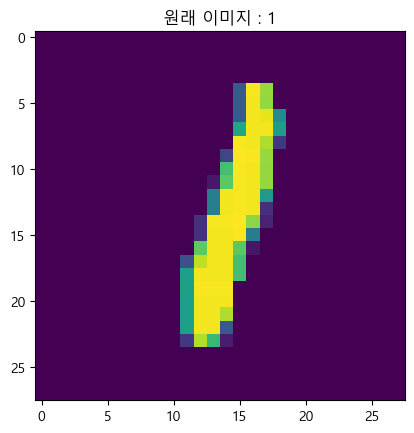

1/1 [==============================] - 0s 90ms/step
[[1.6860751e-09 9.9998903e-01 1.3470913e-07 1.1449525e-11 1.4322723e-07
  2.1015105e-09 3.8928682e-12 9.9306781e-06 6.5909290e-07 8.9271923e-09]] (1, 10)
예측된 숫자 : 1


In [27]:
# 그래프 내부에 한글 깨짐 방지
import matplotlib as mlp
%matplotlib inline

mlp.rcParams["font.family"] = "Malgun Gothic"

# 예측 수행하기
test_image = test_images[455, :, :, 0] # 임의의 손글씨 하나를 가져와서
plt.title(f"원래 이미지 : {test_labels[455]}") 
plt.imshow(test_image)
plt.show() # 그림으로 정답을 확인하고,

pred = model.predict(test_image.reshape(1, 28, 28, 1)) # 예측된 결과는 0~9까지 숫자에 대한 확률로 나온다.
print(pred, pred.shape) 
print(f"예측된 숫자 : {np.argmax(pred)}") # np.argmax = 가장 큰 숫자의 인덱스를 가져온다.
                                          # 왜 인덱스를 가져오나? : 현재 0~9까지의 인덱스에 0~9까지의 손글씨를 대응하여 학습하고 있기 때문에, 각 인덱스가 의미하는 값은
                                          # 0~9까지 손글씨에 대한 확률이고, 가장 높은 확률에 해당하는 인덱스=손글씨 이기때문에 argmax를 가져온다.

In [45]:
# 정확도와 손실값이 변화하는 추이를 시각화해보자.
def learning_curve(history, epoch):
    plt.figure(figsize=(10,5))

    epoch_range = np.arange(1, epoch + 1) # 학습횟수를 입력받아 각 에포크에 대응되는 배열 생성. [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    plt.subplot(1, 2, 1)

    plt.plot(epoch_range, history.history['acc']) # 정확도에 대한 추이 그래프
    plt.title('모델 정확도') # 그래프의 타이틀 설정
    plt.xlabel('학습 횟수') # x축 이름 설정
    plt.ylabel("정확도") # y축 이름 설정
    # plt.show()

    plt.subplot(1, 2, 2)

    plt.plot(epoch_range, history.history['loss']) # 손실값에 대한 추이 그래프
    plt.title('모델 손실값')
    plt.xlabel('학습 횟수') 
    plt.ylabel("손실값")

    plt.show()

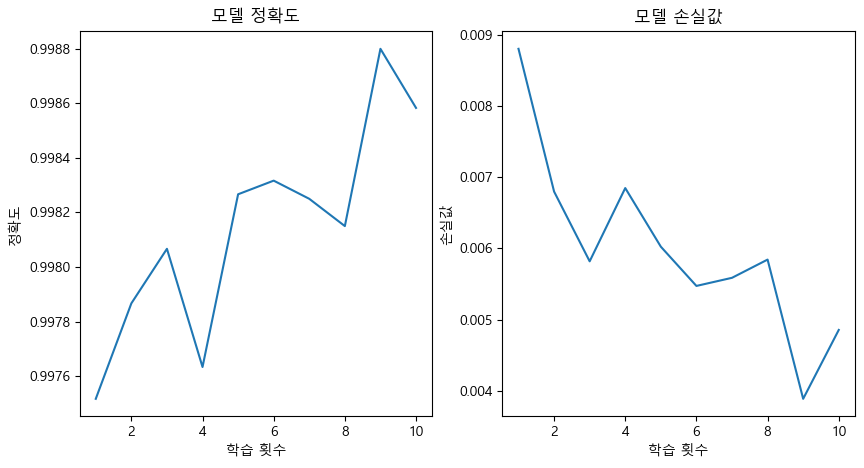

In [46]:
learning_curve(history, 10)